In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

In [2]:
Date = '2022-11-29'

In [3]:
File = 'C:/Users/UsphereLab/Desktop/Outgassing Setup/Scripts/outgassing-setup/OutgassingData_{}.h5'.format(Date)
rga_scans = np.array(pd.read_hdf(File, key='scan/rga'))
amu = np.arange(1,100.01,0.1)
om_temps = np.array(pd.read_hdf(File, key='scan/omega_temp'))
press = np.array(pd.read_hdf(File, key='scan/ed_pres')).astype(float)
tec = np.array(pd.read_hdf(File, key='scan/tec_temp'))
timestamps = np.array(pd.read_hdf(File, key='scan/timestamp'))
delta_t = [datetime.strptime(x, '%Y%m%d%H%M%S') for x in timestamps]
delta_t = np.array([(x-delta_t[0]).total_seconds() for x in delta_t])

In [4]:
print(len(rga_scans), "RGA scans")

5289 RGA scans


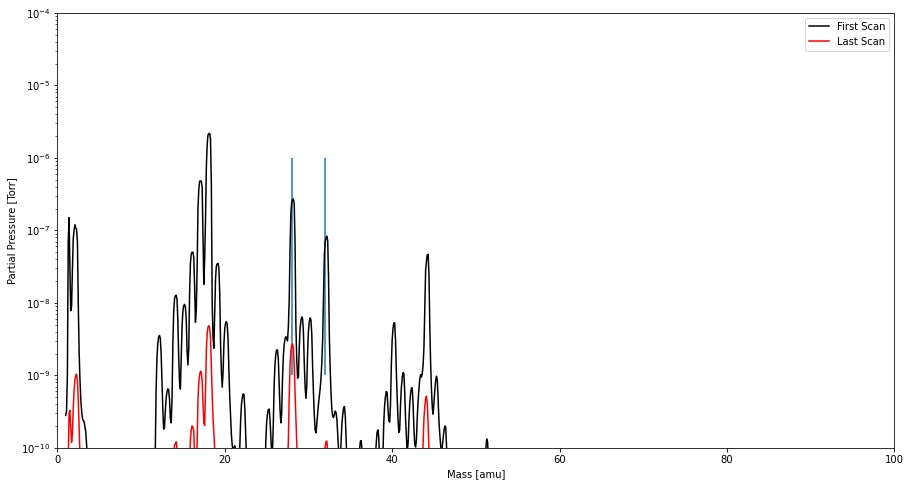

In [5]:
plt.figure(figsize=(15,8))
plt.xlabel('Mass [amu]')
plt.ylabel('Partial Pressure [Torr]')
plt.xlim(0,100)
plt.ylim(1e-10,1e-4)
total_p = []
for x in rga_scans: 
    total_p.append(np.sum(x))
    # plt.plot(amu, x, color='k', lw=1)
plt.plot(amu, rga_scans[0], color='k', alpha=1, label='First Scan')
plt.plot(amu, rga_scans[-1], color='r', alpha=1, label='Last Scan')
plt.legend(loc='upper right')
plt.vlines(x=28, ymin=1e-9, ymax=1e-6)
plt.vlines(x=32, ymin=1e-9, ymax=1e-6)

plt.yscale('log')
plt.show()

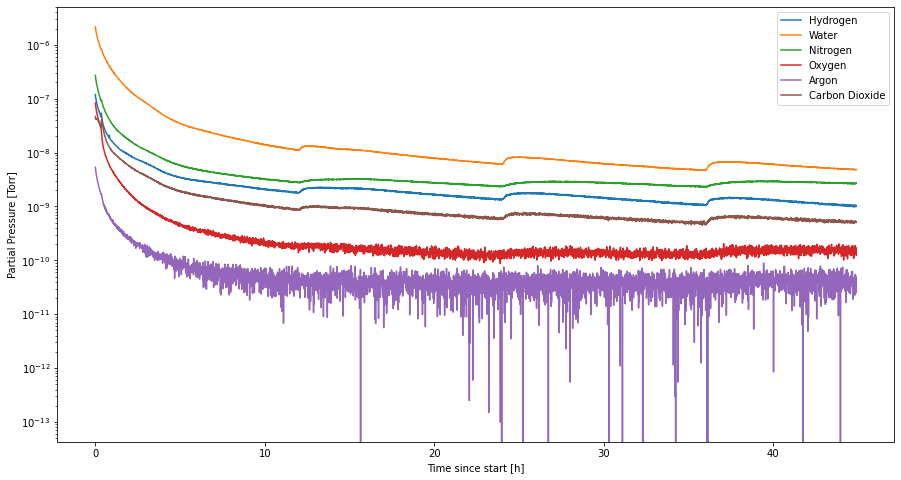

In [6]:
gases = [2,18,28,32,40,44]
labels = ['Hydrogen','Water','Nitrogen','Oxygen','Argon','Carbon Dioxide']

plt.figure(figsize=(15,8))
# plt.xlim(0,np.max(delta_t/3600.0))
# plt.ylim(1e-10,1e-4)
plt.xlabel('Time since start [h]')
plt.ylabel('Partial Pressure [Torr]')

for i,gas in enumerate(gases):
    cut = np.where((amu<gas+0.5) & (amu>gas-0.5))
    pp = [np.max(x[cut]) for x in rga_scans]
    plt.plot(delta_t/3600.0, pp, label=labels[i])

plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

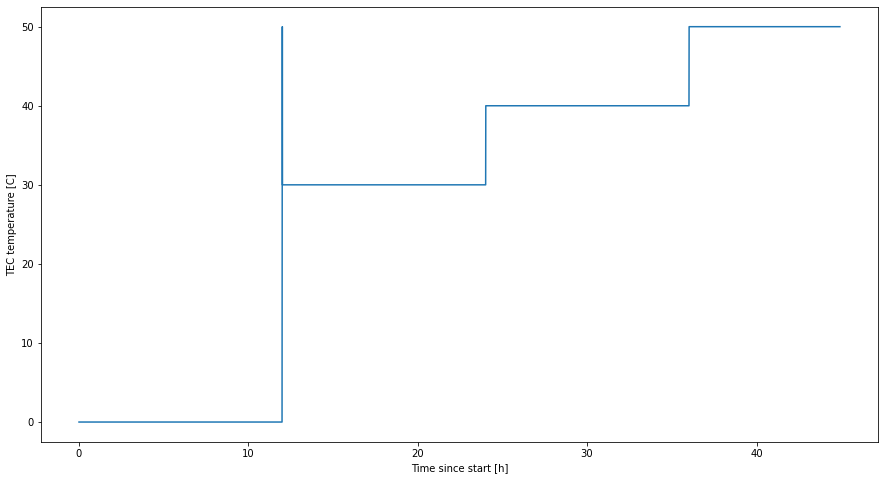

In [7]:
plt.figure(figsize=(15,8))
plt.xlabel('Time since start [h]')
plt.ylabel('TEC temperature [C]')
plt.plot(delta_t/3600, tec)
#plt.xlim(0, 60)
plt.savefig('step_temp.png')

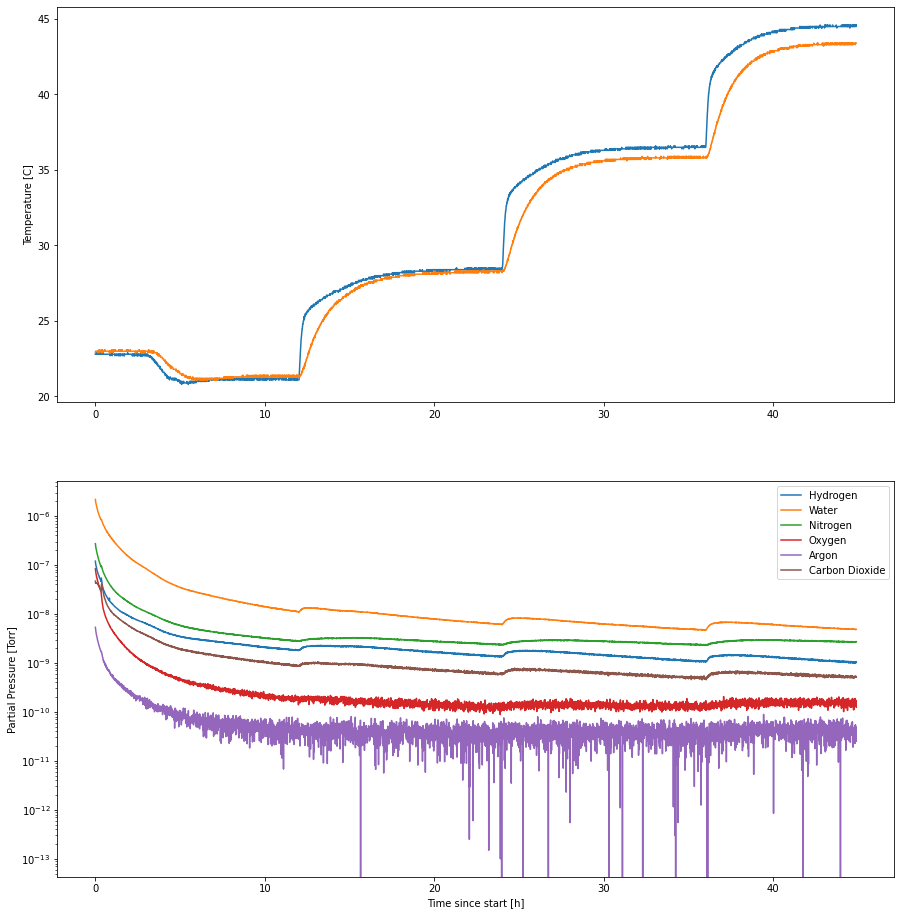

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,16))
ax[1].set_xlabel('Time since start [h]')
ax[1].set_ylabel('Partial Pressure [Torr]')
ax[0].set_ylabel('Temperature [C]')
for i,gas in enumerate(gases):
    cut = np.where((amu<gas+0.5) & (amu>gas-0.5))
    pp = [np.max(x[cut]) for x in rga_scans]
    ax[1].plot(delta_t/3600.0, pp, label=labels[i])

ax[1].legend(loc='upper right')
ax[1].set_yscale('log')

ax[0].plot(delta_t/3600, om_temps[:, 0])
ax[0].plot(delta_t/3600, om_temps[:, 1])

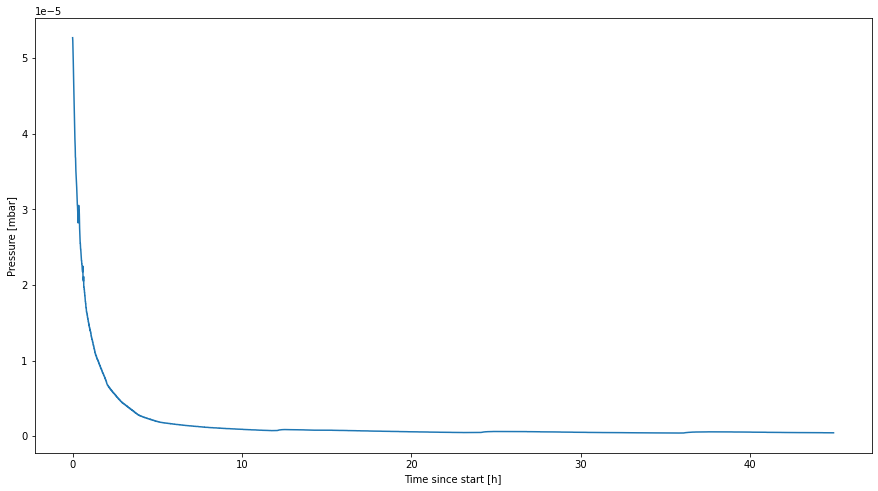

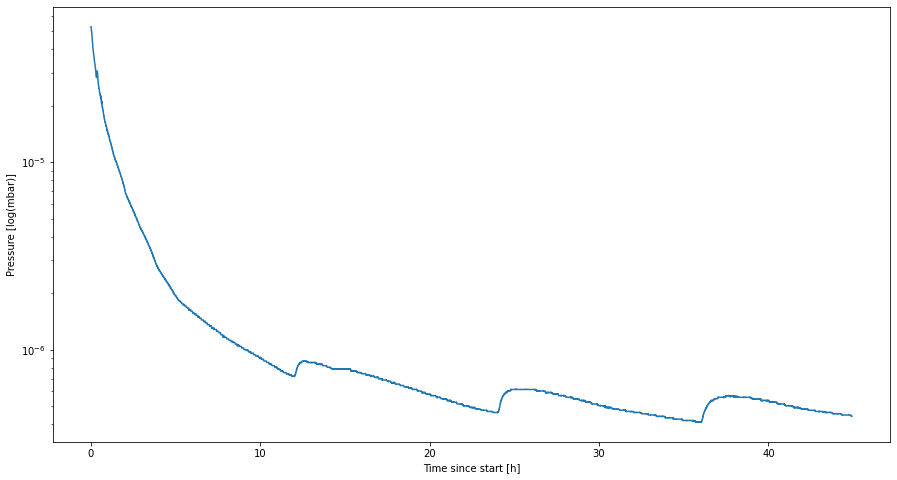

In [9]:
plt.figure(figsize=(15,8))
plt.xlabel('Time since start [h]')
plt.ylabel('Pressure [mbar]')
plt.plot(delta_t/3600, press)

plt.figure(figsize=(15,8))
plt.xlabel('Time since start [h]')
plt.ylabel('Pressure [log(mbar)]')
plt.plot(delta_t/3600, press)
plt.yscale('log')